In [17]:
import glob
import jsonlines
import numpy as np
import pandas as pd
from scipy import stats
from collections import defaultdict
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'

import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preview'] = True
plt.rc('font', family='serif', serif=['Times'])
import warnings
warnings.filterwarnings("ignore")

In [2]:
lang2name = {
    'en': 'ENG',
    'ar': 'ARB',
    'be': 'BEL',
    'bg': 'BUL',
    'da': 'DAN',
    'et': 'EST',
    'de': 'DEU',
    'el': 'ELL',
    'fr': 'FRA',
    'id': 'IND',
    'ja': 'JPN',
    'ko': 'KOR',
    'zh': 'CMN',
    'pt': 'POR',
    'ru': 'RUS',
    'es': 'SPA',
    'sw': 'SWA',
    'ta': 'TAM',
    'tr': 'TUR',
    'vi': 'VIE',
}

In [8]:
dset_fn = "../dataset_dir/xFlickr/annotations/"
langs = ['en', 'de', 'es', 'id', 'ja', 'ru', 'tr', 'zh']

In [9]:
lang2test = {}
for lang in langs:
    with jsonlines.open(dset_fn + f"{lang}/test.jsonl") as reader:
        lang2test[lang] = [item for item in reader]

## Captions length distribution

In [12]:
lang2test['de'][0]

{'sentences': ['Der Mann trägt eine orange Wollmütze.'],
 'id': '1007129816',
 'img_path': '1007129816.jpg'}

In [13]:
lang2test_lens = {lang: [len(e['sentences'][0]) for e in l] for lang, l in lang2test.items()}

en 373
de 216
es 338
id 207
ja 175
ru 290
tr 195
zh 62


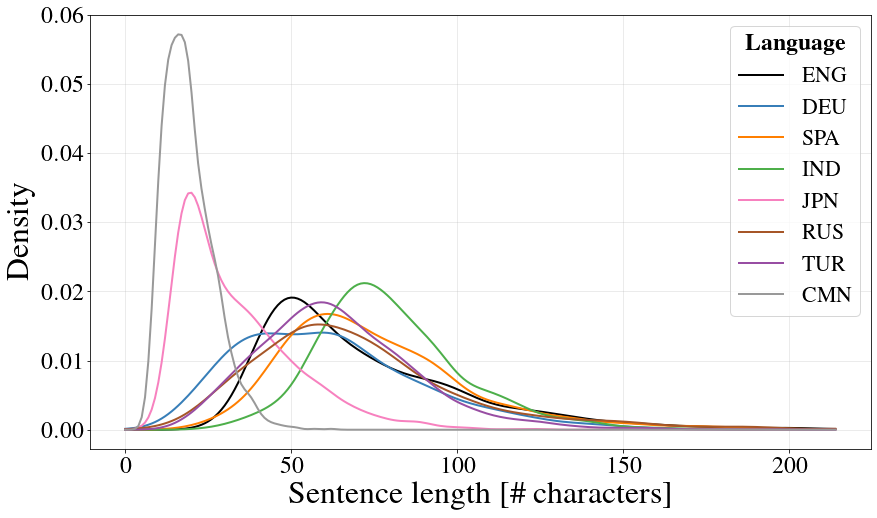

In [19]:
f, ax = plt.subplots(1, 1, figsize=(14,8))

colors = ['#000000', '#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00', '#cccccc']

x = np.arange(0, 215, 1)
for ix, (lang, l) in enumerate(lang2test_lens.items()):
    print(lang, max(l))
    density = stats.kde.gaussian_kde(l)
    ax.plot(x, density(x), lw=2, label=lang2name[lang], color=colors[ix])
    
ax.grid(alpha=0.3)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_xlabel('Sentence length [\# characters]', fontsize=32)
ax.set_ylabel('Density', fontsize=32)
ax.legend(title='\\textbf{Language}', loc='upper right', ncol=1, fontsize=22, title_fontsize=24)

f.savefig("xflickrco-lens.pdf", bbox_anchor="tight")